In [1]:
%matplotlib inline

import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as colors
import matplotlib.cm as cmx
from mpl_toolkits.axes_grid1 import make_axes_locatable
from collections import OrderedDict

import resspect.cosmo_metric_utils as cmu

In [2]:
v = '1'
df = pd.read_csv('/media/RESSPECT/data/PLAsTiCC/for_metrics/final_data/DDF/v' + v + '/summary_stats.csv' )

In [3]:
remap_dict = OrderedDict({
                          'perfect3000': 'Perfect', 
                          'fiducial3000': 'Fiducial', 
                          'random3000': 'Random',
                          '72SNIa28SNII': 'SN-II 28',
                          '75SNIa25SNII': 'SN-II 25', 
                          '90SNIa10SNII': 'SN-II 10',
                          '95SNIa5SNII': 'SN-II 5',
                          '98SNIa2SNII': 'SN-II 2',
                          '99SNIa1SNII': 'SN-II 1',
                          '95SNIa5SNIbc': 'SN-Ibc 5',
                          '98SNIa2SNIbc': 'SN-Ibc 2',
                          '99SNIa1SNIbc': 'SN-Ibc 1',
                          '86SNIa14SNIax': 'SN-Iax 14',
                          '90SNIa10SNIax': 'SN-Iax 10',
                          '95SNIa5SNIax': 'SN-Iax 5',
                          '98SNIa2SNIax': 'SN-Iax 2',
                          '99SNIa1SNIax': 'SN-Iax 1',
                          '99.1SNIa0.9CART': 'CART 0.9',
                          '99.8SNIa0.2SNIa-91bg': 'SN-Ia-91bg 0.2',
                          '99.9SNIa0.1AGN': 'AGN 0.1',
              })

all_shapes = {'SNIa-91bg': 'o',
              'SNIax': 's',
              'SNII': 'd',
              'SNIbc': 'X',
              'AGN': '^',
              'CART': 'v'}

color_nums = np.array([1, 1, 1,               # Special
                       28, 25, 10, 5, 2, 1,   # II
                       5, 2, 1,               # Ibc
                       14, 10, 5, 3, 2, 1,    # Iax
                       1,                     # CART
                       1,                     # 91bg
                       1,                     # AGN
                          ]) 

# Color map
rainbow = cm = plt.get_cmap('plasma_r')
cNorm  = colors.LogNorm(vmin=1, vmax=52) #colors.Normalize(vmin=0, vmax=50)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=rainbow)
color_map = scalarMap.to_rgba(np.arange(1, 52))

0 perfect3000 1
1 fiducial3000 1
2 random3000 1
3 72SNIa28SNII 28
4 75SNIa25SNII 25
5 90SNIa10SNII 10
6 95SNIa5SNII 5
7 98SNIa2SNII 2
8 99SNIa1SNII 1
9 95SNIa5SNIbc 5
10 98SNIa2SNIbc 2
11 99SNIa1SNIbc 1
12 86SNIa14SNIax 14
13 90SNIa10SNIax 10
14 95SNIa5SNIax 5
15 98SNIa2SNIax 3
16 99SNIa1SNIax 2
17 99.1SNIa0.9CART 1
18 99.8SNIa0.2SNIa-91bg 1
19 99.9SNIa0.1AGN 1


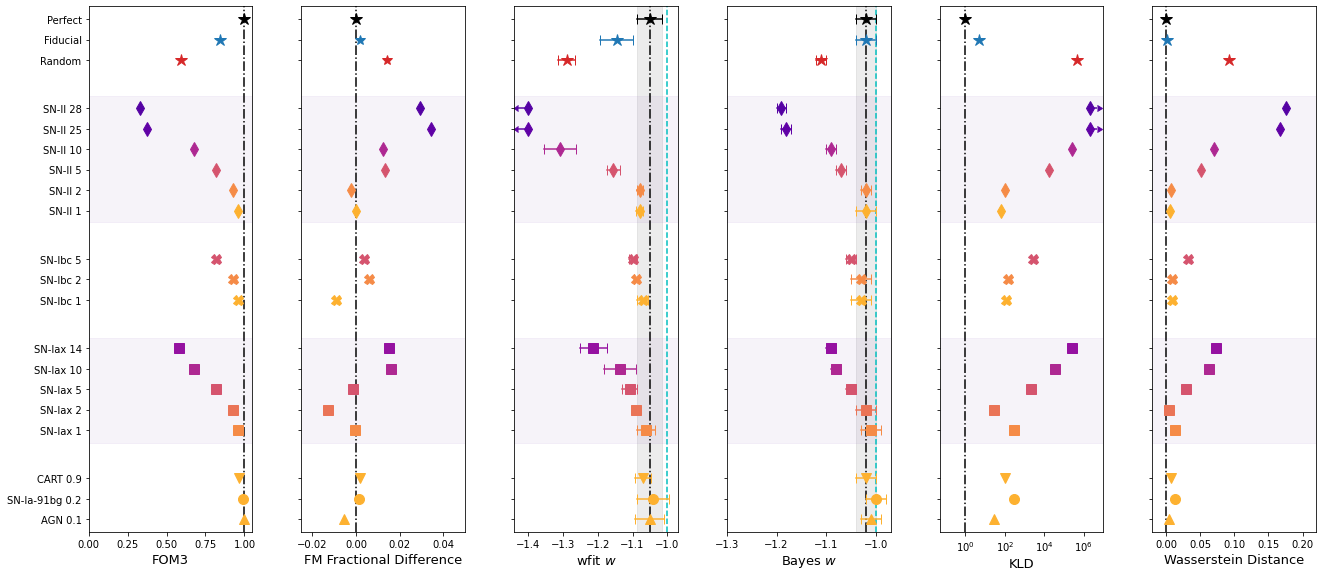

In [4]:
fig, axes = plt.subplots(1, 6, figsize=(22,10), sharey=True)

# wfit
ax1 = axes[2]
# Bayes
ax2 = axes[3]

ax1.axvline(-1, color='c', ls='--')
ax2.axvline(-1, color='c', ls='--')

ax1.axvline(df['wfit_w_lowz'].loc[df['case'] == 'perfect3000'].values, color='k', ls='-.')
ax1.axvspan(df['wfit_w_lowz'].loc[df['case'] == 'perfect3000'].values-df['wfit_wsig_lowz'].loc[df['case'] == 'perfect3000'].values, 
            df['wfit_w_lowz'].loc[df['case'] == 'perfect3000'].values+df['wfit_wsig_lowz'].loc[df['case'] == 'perfect3000'].values, 
            alpha=0.15, color='grey')

ax2.axvline(df['stan_w_lowz'].loc[df['case'] == 'perfect3000'].values, color='k', ls='-.')
ax2.axvspan(df['stan_w_lowz'].loc[df['case'] == 'perfect3000'].values-df['stan_wsig_lowz'].loc[df['case'] == 'perfect3000'].values, 
            df['stan_w_lowz'].loc[df['case'] == 'perfect3000'].values+df['stan_wsig_lowz'].loc[df['case'] == 'perfect3000'].values, 
            alpha=0.15, color='grey')

# Fisher
# percent different
ax3 = axes[1]
ax3.axvline(0, color='k', ls='-.')
df_fisher = pd.read_csv('/media/RESSPECT/data/PLAsTiCC/for_metrics/final_data/DDF/v' + v + '/stan_input/stan_input_salt2mu_lowz_withbias_perfect3000.csv')
sig_perf = cmu.fisher_results(df_fisher['z'].values, df_fisher['muerr'].values)[0]


# Wasserstein
ax4 = axes[5]
ax4.axvline(0, color='k', ls='-.')

# FOM3
ax5 = axes[0]
ax5.axvline(df['fom3'].loc[df['case'] == 'perfect3000'].values, color='k', ls='-.')

# KLD
ax6 = axes[4]
ax6.axvline(1, color='k', ls='-.')

i = 0
tick_lbls = []
i_list = []
for j, (a, c) in enumerate(zip(remap_dict, color_nums)):
    print(j,a,c)

    # wfit
    wfw = df['wfit_w_lowz'].loc[df['case'] == a].values
    wfw_sig = df['wfit_wsig_lowz'].loc[df['case'] == a].values
    class_ = str.split(remap_dict[a])[0]
      
    # Fisher
    df_ = pd.read_csv('/media/RESSPECT/data/PLAsTiCC/for_metrics/final_data/DDF/v' + v + '/stan_input/stan_input_salt2mu_lowz_withbias_' + a + '.csv')
    sig = cmu.fisher_results(df_['z'].values, df_['muerr'].values)[0]
        
    # Wasserstein
    wsd = df['EMD'].loc[df['case'] == a].values
        
    # fom3
    fom3 = df['fom3'].loc[df['case'] == a].values
        
    # KLD
    kld = df['KLD'].loc[df['case'] == a].values

    if '91bg' in class_:
        class_ = 'SNIa-91bg'
    else:
        class_ = class_.replace('-', '')

    bad_data=False
    if wfw[0] < -2.2:
        wfw[0] = -1.4
        bad_data=True
        xuplims=[-1.5]
        

    if 'fiducial' in a:
        mfc = 'tab:blue'
    elif 'random' in a:
        mfc = 'tab:red'
    elif 'perfect' in a:
        mfc = 'k'
    else:
        mfc = color_map[c]

    if 'fiducial' in a:
        if bad_data:
            ax1.errorbar(wfw, [-i], xerr=[0.03], marker='*',color='tab:blue',
                             xuplims=xuplims, markersize=12, mfc=mfc)
        else:
            ax1.plot(wfw, -i, '*', color='tab:blue', ms=12, mfc=mfc)
            ax1.plot([wfw - wfw_sig, wfw + wfw_sig], [-i, -i], "|-", color='tab:blue', ms=10)
    elif 'random' in a:
        if bad_data:
            ax1.errorbar(wfw, [-i], xerr=[0.03], marker='*',color='tab:red',
                         xuplims=xuplims, markersize=12, mfc=mfc)
            ax6.errorbar(2e6, [-i], xerr=[3e6], marker='*',color='tab:red',
                              xlolims=True, markersize=12, mfc=mfc)
        else:
            ax1.plot(wfw, -i, '*', color='tab:red', ms=12, mfc=mfc)
            ax1.plot([wfw - wfw_sig, wfw + wfw_sig], [-i, -i], "|-", color='tab:red', ms=10)
    elif 'perfect' in a:
        ax1.plot(wfw, -i, '*', color='k', ms=12, mfc=mfc)
        ax1.plot([wfw - wfw_sig, wfw + wfw_sig], [-i, -i], "|-", color='k', ms=10 )
    else:
        if bad_data:
            ax1.errorbar(wfw, [-i], xerr=[0.03], marker=all_shapes[class_],color=color_map[c],
                         xuplims=xuplims, markersize=10)
        else:
            ax1.plot(wfw, -i, color=color_map[c], ms=10, marker=all_shapes[class_], mfc=mfc)
            ax1.plot([wfw - wfw_sig, wfw + wfw_sig], [-i, -i], "|-", color=color_map[c], ms=10)

    # Stan/Bayes
    bw = df['stan_w_lowz'].loc[df['case'] == a].values
    bw_sig = df['stan_wsig_lowz'].loc[df['case'] == a].values
        
    bad_data=False
    if bw[0] < -2.2:
        bw[0] = -1.4
        bad_data=True
        xuplims=[-1.5]

    if 'fiducial' in a:
        if bad_data:
            ax2.errorbar(bw, [-i], xerr=[0.03], marker='*',color='tab:blue',
                         xuplims=xuplims, markersize=12, mfc=mfc)
        else:
            ax2.plot(bw, -i, '*', color='tab:blue', ms=12, mfc=mfc)
            ax2.plot([bw - bw_sig, bw + bw_sig], [-i, -i], "|-", color='tab:blue', ms=10)
            ax3.plot((sig[1]-sig_perf[1])/sig_perf[1], -i, color='tab:blue', marker='*', ms=10, mfc=mfc)
            ax4.plot(wsd, -i, '*', color='tab:blue', ms=12, mfc=mfc)
            ax5.plot(fom3, -i, '*', color='tab:blue', ms=12, mfc=mfc)
            ax6.semilogx(kld, -i, '*', color='tab:blue', ms=12, mfc=mfc)
    elif 'random' in a:
        if bad_data:
            ax2.errorbar(bw, [-i], xerr=[0.03], marker='*',color='tab:red',
                         xuplims=xuplims, markersize=12, mfc=mfc)
        else:
            ax2.plot(bw, -i, '*', color='tab:red', ms=12, mfc=mfc)
            ax2.plot([bw - bw_sig, bw + bw_sig], [-i, -i], "|-", color='tab:red', ms=10)
            ax3.plot((sig[1]-sig_perf[1])/sig_perf[1], -i, 'o', color='tab:red', marker='*', ms=10, mfc=mfc)
            ax4.plot(wsd, -i, '*', color='tab:red', ms=12, mfc=mfc)
            ax5.plot(fom3, -i, '*', color='tab:red', ms=12, mfc=mfc)
            ax6.semilogx(kld, -i, '*', color='tab:red', ms=12, mfc=mfc)
            
    elif 'perfect' in a:
        ax2.plot(bw, -i, '*', color='k', ms=12, mfc=mfc)
        ax2.plot([bw - bw_sig, bw + bw_sig], [-i, -i], "|-", color='k', ms=10 )
        ax3.plot(0, -i, '*', color='k', ms=12, mfc=mfc)
        ax4.plot(0, -i, '*', color='k', ms=12, mfc=mfc)
        ax5.plot(fom3, -i, '*', color='k', ms=12, mfc=mfc)
        ax6.semilogx(1, -i, '*', color='k', ms=12, mfc=mfc)
           
    else:
        ax2.plot(bw, -i, color=color_map[c], ms=10, marker=all_shapes[class_], mfc=mfc)
        ax2.plot([bw - bw_sig, bw + bw_sig], [-i, -i], "|-", color=color_map[c], ms=10)
        ax3.plot((sig[1]-sig_perf[1])/sig_perf[1], -i, color=color_map[c], marker=all_shapes[class_], ms=10, mfc=mfc)
        ax4.plot(wsd, -i, color=color_map[c], ms=10, marker=all_shapes[class_], mfc=mfc)
        ax5.plot(fom3, -i, color=color_map[c], ms=10, marker=all_shapes[class_], mfc=mfc)
            
        # these do not have coverage for KLD calculations
        if a in ['72SNIa28SNII', '75SNIa25SNII']:
            ax6.errorbar(2e6, [-i], xerr=[3e6],  marker=all_shapes[class_], color=color_map[c],
                         xlolims=True, 
                             markersize=10, mfc=mfc)
        else:
            ax6.semilogx(kld, -i, color=color_map[c], ms=10, marker=all_shapes[class_], mfc=mfc)
            
    tick_lbls.append(remap_dict[a])
    i_list.append(-i)
    i +=0.8
    if 'random' in a or '99SNIa1' in a:
        i_list.append(-i)
        i += 1.1
        tick_lbls.append('')

tick_locs = i_list[::-1]
#np.arange(-len(tick_lbls)+1, 1)
ax1.set_yticks(tick_locs)
ax1.set_yticklabels(tick_lbls[::-1], fontsize=13)

ax1.set_ylim(i_list[-1]-0.5, i_list[0]+0.5)#-len(tick_lbls)+0.5, 0.5)


ax1.set_xlabel(r'wfit $w$', fontsize=13)
ax2.set_xlabel(r'Bayes $w$', fontsize=13)
ax3.set_xlabel('FM Fractional Difference', fontsize=13)
ax4.set_xlabel('Wasserstein Distance', fontsize=13)
ax5.set_xlabel('FOM3', fontsize=13)
ax6.set_xlabel('KLD', fontsize=13)
plt.subplots_adjust(bottom=0.15, wspace=0.3) # wspace=0.05

ax1.set_xlim(-1.44, -0.97)
ax2.set_xlim(-1.3, -0.97)
ax3.set_xlim(-0.025, 0.05)
ax4.set_xlim(-0.02, 0.22)
ax5.set_xlim(0, 1.05)
ax6.set_xlim(0.05, 1e7)


ticks = [-4, -11, -15, -21]
   
for ax in axes:
    for t in ticks:
        yticks = ax.yaxis.get_major_ticks()
        yticks[t].set_visible(False)
    ax.axvspan(-2.3, 5e10, ymin=0.59, ymax=0.83, alpha=0.08, color='tab:purple')
    ax.axvspan(-2.3, 5e10, ymin=0.17, ymax=0.37, alpha=0.08, color='tab:purple')
    
#plt.savefig('combined_metrics_DDF_v' + v + '.png', bbox_inches='tight')

plt.show()
